In [16]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import sklearn.feature_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featuredf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

In [17]:
MI = sklearn.feature_selection.mutual_info_classif(preProcFeats, preProcLabels, discrete_features = False)

#Normalise so that MI of labels with themselves give unity:
preProcLabelsf = preProcLabels.reshape(-1,1)
MInorm = sklearn.feature_selection.mutual_info_classif(preProcLabelsf, preProcLabels, discrete_features=True)

MI = MI/MInorm

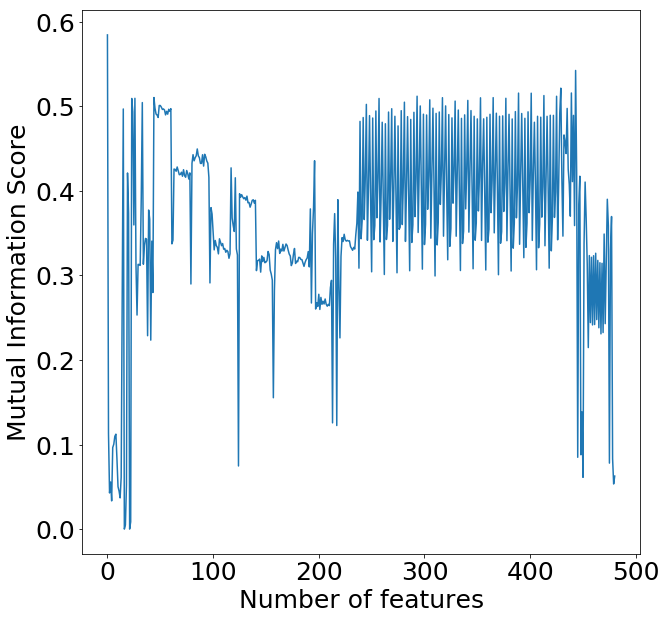

In [18]:
featidx = np.arange(preProcFeats.shape[1])

plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Number of features')
plt.ylabel('Mutual Information Score')
plt.plot(featidx, MI)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [19]:
cols = featuredf.columns.values
print np.argwhere(cols=='pixelMax_0_0')
print np.argwhere(cols == 'pixelMean_15_3')

[[237]]
[[428]]


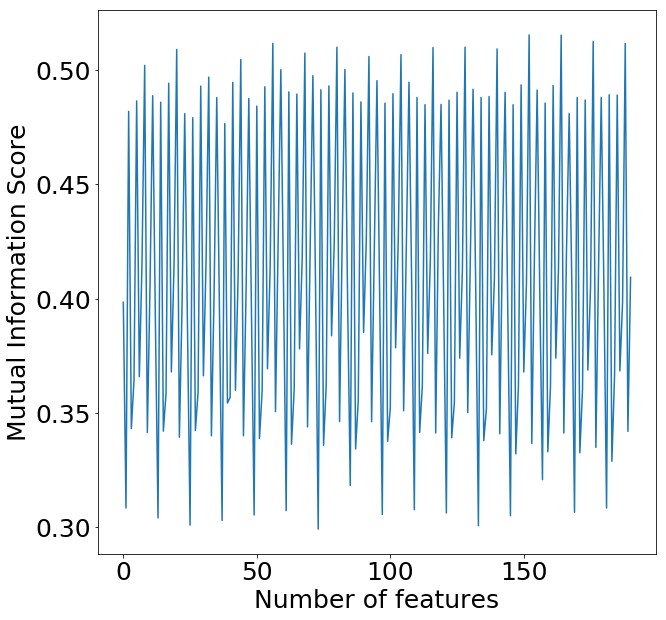

In [20]:
featidx = np.arange(preProcFeats.shape[1])
sliceMI = MI[237:428]

plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Number of features')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(sliceMI.size), sliceMI)
#plt.savefig('feature.importance.graphs/pixelstatsMI.png')
plt.show()

In [21]:
highMI = np.argwhere(sliceMI > 0.7)
highMI = highMI + 237
#print highMI
print cols[highMI]

[]


In [22]:
cols = featuredf.columns.values
print np.argwhere(cols=='windTimeStatsstd0')
print np.argwhere(cols == 'windTimeStatsmean7')

[[45]]
[[132]]


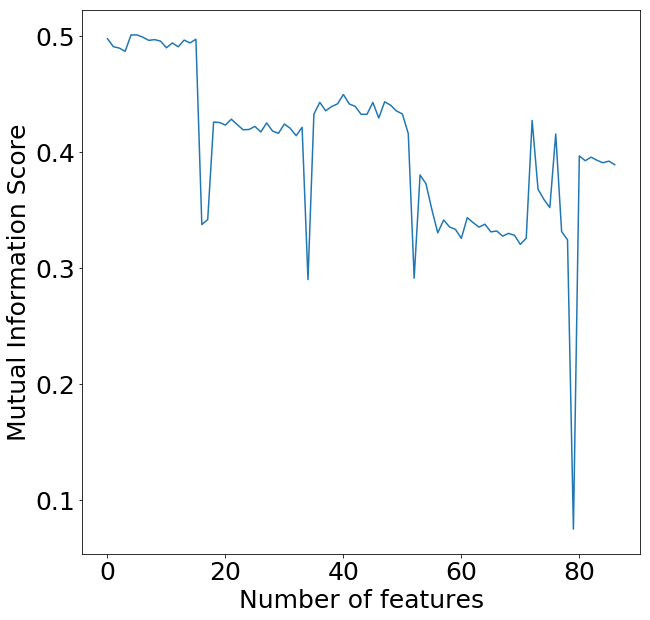

In [23]:
featidx = np.arange(preProcFeats.shape[1])
sliceMI = MI[45:132]

plt.figure()
plt.figure(figsize=(10, 10))
plt.xlabel('Number of features')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(sliceMI.size), sliceMI)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [24]:
maxidx = np.array([])
for idx in featidx[237:429]:
    if (idx-237) % 3 == 0 :
        maxidx = np.append(maxidx, featidx[idx])

minidx = np.array([])
for idx in featidx[237:429]:
    if (idx-238) % 3 == 0 :
        minidx = np.append(minidx, featidx[idx])
   

meanidx = np.array([])
for idx in featidx[237:429]:
    if (idx-236) % 3 == 0 :
        meanidx = np.append(meanidx, featidx[idx])

print cols[237], cols[238], cols[239]

pixelMax_0_0 pixelMin_0_0 pixelMean_0_0


In [25]:
maxidx = maxidx.astype(int)
#print cols[maxidx]
print maxidx.size

minidx = minidx.astype(int)
#print cols[minidx]
print minidx.size

meanidx = meanidx.astype(int)
print cols[meanidx]
print meanidx.size

pixmax = preProcFeats[:, 237]
pixstatsmax = preProcFeats[:,maxidx]

pixmin = preProcFeats[:, 238]
pixstatsmin = preProcFeats[:,minidx]

pixmean = preProcFeats[:, 239]
pixstatsmean = preProcFeats[:, meanidx]

64
64
['pixelMean_0_0' 'pixelMean_0_1' 'pixelMean_0_2' 'pixelMean_0_3'
 'pixelMean_1_0' 'pixelMean_1_1' 'pixelMean_1_2' 'pixelMean_1_3'
 'pixelMean_2_0' 'pixelMean_2_1' 'pixelMean_2_2' 'pixelMean_2_3'
 'pixelMean_3_0' 'pixelMean_3_1' 'pixelMean_3_2' 'pixelMean_3_3'
 'pixelMean_4_0' 'pixelMean_4_1' 'pixelMean_4_2' 'pixelMean_4_3'
 'pixelMean_5_0' 'pixelMean_5_1' 'pixelMean_5_2' 'pixelMean_5_3'
 'pixelMean_6_0' 'pixelMean_6_1' 'pixelMean_6_2' 'pixelMean_6_3'
 'pixelMean_7_0' 'pixelMean_7_1' 'pixelMean_7_2' 'pixelMean_7_3'
 'pixelMean_8_0' 'pixelMean_8_1' 'pixelMean_8_2' 'pixelMean_8_3'
 'pixelMean_9_0' 'pixelMean_9_1' 'pixelMean_9_2' 'pixelMean_9_3'
 'pixelMean_10_0' 'pixelMean_10_1' 'pixelMean_10_2' 'pixelMean_10_3'
 'pixelMean_11_0' 'pixelMean_11_1' 'pixelMean_11_2' 'pixelMean_11_3'
 'pixelMean_12_0' 'pixelMean_12_1' 'pixelMean_12_2' 'pixelMean_12_3'
 'pixelMean_13_0' 'pixelMean_13_1' 'pixelMean_13_2' 'pixelMean_13_3'
 'pixelMean_14_0' 'pixelMean_14_1' 'pixelMean_14_2' 'pixelMean_14_3'

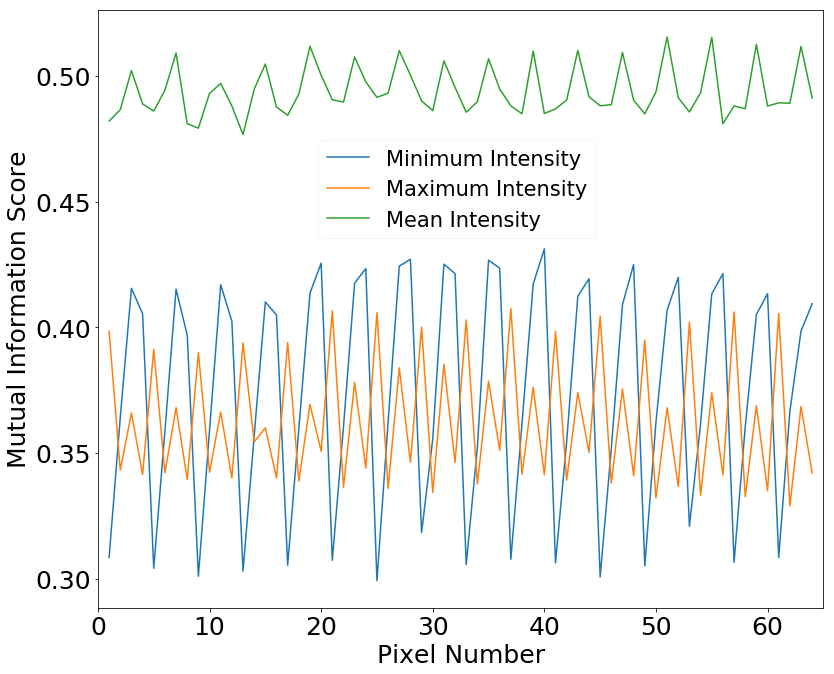

In [46]:
plt.figure(figsize=(13, 11))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=21)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.xlabel('Pixel Number')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(minidx.size) + 1 , MI[minidx], label = 'Minimum Intensity')
plt.plot(np.arange(maxidx.size) + 1, MI[maxidx], label = 'Maximum Intensity')
plt.plot(np.arange(meanidx.size)+ 1, MI[meanidx], label = 'Mean Intensity')
plt.xlim(0,65)
plt.legend(framealpha = 0.2, bbox_to_anchor = (0.7,0.7))
plt.savefig('./graphs/pixstatsMI.png')
plt.show()

In [47]:
#Calculate MI of first pixel with every other:
MImin = sklearn.feature_selection.mutual_info_regression(pixstatsmin[:,1:], pixmin, discrete_features = False)
MImax = sklearn.feature_selection.mutual_info_regression(pixstatsmax[:,1:], pixmin, discrete_features = False)
MImean = sklearn.feature_selection.mutual_info_regression(pixstatsmean[:,1:], pixmin, discrete_features = False)

#Normalise using MI of first pixel with itself:
pixminf = pixmin.reshape(-1,1)
MIminnorm = sklearn.feature_selection.mutual_info_regression(pixminf, pixmin, discrete_features = False)
MImin = MImin/MIminnorm

pixmaxf = pixmax.reshape(-1,1)
MImaxnorm = sklearn.feature_selection.mutual_info_regression(pixmaxf, pixmax, discrete_features = False)
MImax = MImax/MImaxnorm

pixmeanf = pixmean.reshape(-1,1)
MImeannorm = sklearn.feature_selection.mutual_info_regression(pixmeanf, pixmean, discrete_features = False)
MImean = MImean/MImeannorm

print MImin.shape

(63,)


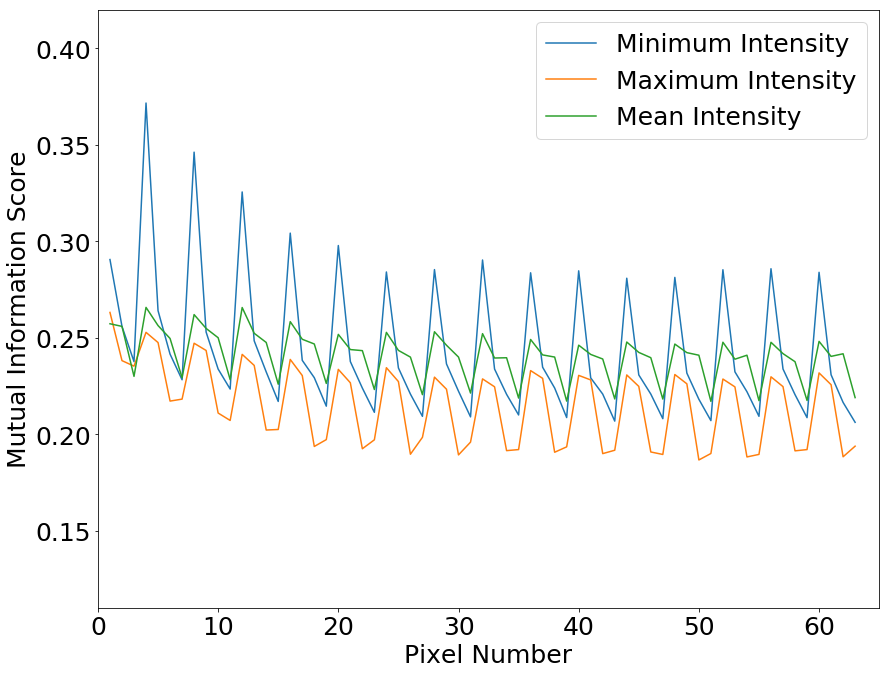

In [49]:
plt.figure(figsize=(14, 11))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.xlabel('Pixel Number')
plt.ylabel('Mutual Information Score')
plt.plot(np.arange(MImin.size)+1, MImin, label = 'Minimum Intensity')
plt.plot(np.arange(MImin.size)+1, MImax, label = 'Maximum Intensity')
plt.plot(np.arange(MImin.size)+1, MImean, label = 'Mean Intensity')
plt.ylim(0.11, 0.42)
plt.xlim(0,65)
plt.legend()
plt.savefig('./graphs/intrapixMI.png')
plt.show()